# Portuguese Agriculture Notebook

| Raquel Peralta, January 2023.

In this notebook I'm going to analyze data regarding the agricultural sector from 1989 to 2022.  
The data was collected from PORDATA, a Contemporary Portugal Database equipped with official and certified statistics about Portugal and Europe.  
#
The two main questions to be analyzed are:
- How has the demography of the agriculture workforce in Portugal changed over the last 30 years?
- How are the demographic changes related to the value created by agriculture in Portugal over the last 30 years?


## Setting up my environment

In [86]:
# Base libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # to create trend lines

# Extra libraries
import matplotlib.ticker as mtick # to format y axis as a percentage instead of decimal value
import matplotlib as mpl # to format fonts

# Magic function for plots to be displayed inline within the notebook
%matplotlib inline

# Formatting fonts in all graphs of this notebook
mpl.rcParams['font.family'] = 'Century Gothic'

## Import data

For each topic there is an excel file that was downloaded from PORDATA. I'm going to treat them similarly. 
- Import the data into a dataframe;
- The first rows and bottom rows contain context information, and the actual data exists in the middle. I'm going to remove those rows;
- Different files have a different number of columns;
- The files are in portuguese, so I'm going to give new names to columns in english;
- I'm going to format data as int or float, instead of string.


### Gender data

In [87]:
# create variables to avoid hard coded values:
file_path_gender = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_mão-de-obra-agrícola-sexo.xlsx"
file_sheet_name = "Quadro"
skip_rows_gender = 7
ignore_bottom_gender = 12
columns_gender = "A:D"
headers_gender = ["Year", "Total", "Male", "Female"]

# import data
df_gender = pd.read_excel(file_path_gender, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_gender,
                    usecols=columns_gender)

df_gender.head(15)

,Unnamed: 0,Total,Masculino,Feminino
0,1989,1560990,833046,727944
1,1993,1289332,688879,600453
2,1995,1182767,630043,552724
3,1997,1080967,574030,506937
4,1999,1083838,575271,508567
5,2003,911322,482280,429042
6,2005,806847,429766,377081
7,2007,682292,362684,319608
8,2009,708076,386681,321395
9,2013,626393,346896,279496


In [88]:
# set column headers
df_gender.columns = headers_gender

# limit the rows of data to 12
df_gender = df_gender.head(ignore_bottom_gender)

df_gender

,Year,Total,Male,Female
0,1989,1560990,833046,727944
1,1993,1289332,688879,600453
2,1995,1182767,630043,552724
3,1997,1080967,574030,506937
4,1999,1083838,575271,508567
5,2003,911322,482280,429042
6,2005,806847,429766,377081
7,2007,682292,362684,319608
8,2009,708076,386681,321395
9,2013,626393,346896,279496


In [89]:
# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_gender = df_gender.astype({"Year": int,
                            "Total": int,
                            "Male": int,
                            "Female": int})

df_gender.dtypes

Year      int32
Total     int32
Male      int32
Female    int32
dtype: object

In [90]:
# Check dataframe
df_gender

,Year,Total,Male,Female
0,1989,1560990,833046,727944
1,1993,1289332,688879,600453
2,1995,1182767,630043,552724
3,1997,1080967,574030,506937
4,1999,1083838,575271,508567
5,2003,911322,482280,429042
6,2005,806847,429766,377081
7,2007,682292,362684,319608
8,2009,708076,386681,321395
9,2013,626393,346896,279496


### Age data

In [91]:
# create variables to avoid hard coded values:
file_path_age = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_mão-de-obra-agrícola-grupo-etário.xlsx"
file_sheet_name = "Quadro"
skip_rows_age = 7
ignore_bottom_age = 12
columns_age = "A:G"
headers_age = ["Year", "Total", "0-24", "25-34", "35-44", "45-54", "55+"]

# import data
df_age = pd.read_excel(file_path_age, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_age,
                    usecols=columns_age)

# set column headers
df_age.columns = headers_age

# limit the rows of data to 12
df_age = df_age.head(ignore_bottom_age)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_age = df_age.astype({"Year": int,
                        "Total": int,
                        "0-24": int,
                        "25-34": int,
                        "35-44": int,
                        "45-54": int,
                        "55+": int})

df_age.dtypes


Year     int32
Total    int32
0-24     int32
25-34    int32
35-44    int32
45-54    int32
55+      int32
dtype: object

In [92]:
# Check dataframe
df_age

,Year,Total,0-24,25-34,35-44,45-54,55+
0,1989,1560990,307830,161560,199585,285988,606027
1,1993,1289332,238740,155399,141130,205873,548190
2,1995,1182767,194419,121864,144317,198705,523462
3,1997,1080967,166200,108246,127917,180710,497894
4,1999,1083838,159368,111047,135173,178554,499696
5,2003,911322,108898,88575,108952,148393,456504
6,2005,806847,85784,74409,95098,133368,418189
7,2007,682292,65062,60909,76489,112620,367212
8,2009,708076,43849,59456,84116,127250,393405
9,2013,626393,36238,48836,75776,112571,352972


### Education data

In [93]:
# create variables to avoid hard coded values:
file_path_education = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_mão-de-obra-agrícola-por-nível-de-instrução.xlsx"
file_sheet_name = "Quadro"
skip_rows_education = 7
ignore_bottom_education = 12
columns_education = "A:G"
headers_education = ["Year", "Total", "No education", "Primary", "Secondary", "Tertiary", "Other"]

# import data
df_education = pd.read_excel(file_path_education, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_education,
                    usecols=columns_education)

# set column headers
df_education.columns = headers_education

# limit the rows of data to 12
df_education = df_education.head(ignore_bottom_education)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_education = df_education.astype({"Year": int,
                                    "Total": int,
                                    "No education": int,
                                    "Primary": int,
                                    "Secondary": int,
                                    "Tertiary": int,
                                    "Other": int})

df_education.dtypes


Year            int32
Total           int32
No education    int32
Primary         int32
Secondary       int32
Tertiary        int32
Other           int32
dtype: object

In [94]:
# Check dataframe
df_education

,Year,Total,No education,Primary,Secondary,Tertiary,Other
0,1989,1560990,594558,797690,79507,12818,76417
1,1993,1289332,454018,678140,76134,15471,65569
2,1995,1182767,397176,653651,48052,22097,61791
3,1997,1080967,348070,598397,50313,23833,60355
4,1999,1083838,309729,626169,59469,36336,52135
5,2003,911322,252944,522887,54324,34802,46365
6,2005,806847,196410,479360,51212,37155,42709
7,2007,682292,144975,418210,45640,34903,38563
8,2009,708076,130564,438085,54323,43208,41896
9,2013,626393,92087,377070,61297,46547,49391


### Remuneration

In [95]:
# create variables to avoid hard coded values:
file_path_remuneration = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_Remuneração-por-qualificação.xlsx"
file_sheet_name = "Quadro"
skip_rows_remuneration = 7
ignore_bottom_remuneration = 37
columns_remuneration = "A:J"
headers_remuneration = ["Year", "Total", "Senior officials", "Middle officials", "Foremen and team leaders", "Highly qualified professionals", "Qualified professionals", "Semi qualified professionals", "Unqualified professionals", "Interns"]

# import data
df_remuneration = pd.read_excel(file_path_remuneration, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_remuneration,
                    usecols=columns_remuneration)

# set column headers
df_remuneration.columns = headers_remuneration

# limit the rows of data to 37
df_remuneration = df_remuneration.head(ignore_bottom_remuneration)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_remuneration = df_remuneration.astype({"Year": int,
                                            "Total": int,
                                            "Senior officials": int,
                                            "Middle officials": int,
                                            "Foremen and team leaders": int,
                                            "Highly qualified professionals": int,
                                            "Qualified professionals": int,
                                            "Semi qualified professionals": int,
                                            "Unqualified professionals": int,
                                            "Interns": int})

df_remuneration.dtypes


Year                              int32
Total                             int32
Senior officials                  int32
Middle officials                  int32
Foremen and team leaders          int32
Highly qualified professionals    int32
Qualified professionals           int32
Semi qualified professionals      int32
Unqualified professionals         int32
Interns                           int32
dtype: object

In [96]:
# Check dataframe
df_remuneration

,Year,Total,Senior officials,Middle officials,Foremen and team leaders,Highly qualified professionals,Qualified professionals,Semi qualified professionals,Unqualified professionals,Interns
0,1985,106,229,126,153,173,116,96,87,86
1,1986,121,248,154,164,191,131,114,104,106
2,1987,145,330,287,209,241,163,132,118,122
3,1988,161,349,228,231,284,188,149,137,140
4,1989,179,356,233,244,288,198,169,159,143
5,1990,0,0,0,0,0,0,0,0,0
6,1991,247,485,320,326,410,261,233,220,227
7,1992,276,547,421,381,400,303,265,243,233
8,1993,302,722,496,420,519,330,286,262,276
9,1994,327,928,576,451,522,354,306,286,313


In [97]:
# I'm going to remove the year 1990 and 2001 because of lack of data
df_remuneration = df_remuneration[ (df_remuneration["Total"]>0) ]
df_remuneration

,Year,Total,Senior officials,Middle officials,Foremen and team leaders,Highly qualified professionals,Qualified professionals,Semi qualified professionals,Unqualified professionals,Interns
0,1985,106,229,126,153,173,116,96,87,86
1,1986,121,248,154,164,191,131,114,104,106
2,1987,145,330,287,209,241,163,132,118,122
3,1988,161,349,228,231,284,188,149,137,140
4,1989,179,356,233,244,288,198,169,159,143
6,1991,247,485,320,326,410,261,233,220,227
7,1992,276,547,421,381,400,303,265,243,233
8,1993,302,722,496,420,519,330,286,262,276
9,1994,327,928,576,451,522,354,306,286,313
10,1995,349,842,733,489,569,387,328,300,295


### Familiar workers

Familiar: quantity of people working on farms owned by a family member.  
Non-familiar: quantity of people working on farms not owned by a family member.

In [98]:
# create variables to avoid hard coded values:
file_path_familiar = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_mão-de-obra-agrícola-familiar-e-não-familiar.xlsx"
file_sheet_name = "Quadro"
skip_rows_familiar = 7
ignore_bottom_familiar = 12
columns_familiar = "A:D"
headers_familiar = ["Year", "Total", "Familiar", "Non familiar"]

# import data
df_familiar = pd.read_excel(file_path_familiar, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_familiar,
                    usecols=columns_familiar)

# set column headers
df_familiar.columns = headers_familiar

# limit the rows of data to 12
df_familiar = df_familiar.head(ignore_bottom_familiar)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_familiar = df_familiar.astype({"Year": int,
                                "Total": int,
                                "Familiar": int,
                                "Non familiar": int})

df_familiar.dtypes


Year            int32
Total           int32
Familiar        int32
Non familiar    int32
dtype: object

In [99]:
# check dataframe
df_familiar

,Year,Total,Familiar,Non familiar
0,1989,1560990,1474557,86433
1,1993,1289332,1223763,65569
2,1995,1182767,1120976,61791
3,1997,1080967,1020612,60355
4,1999,1083838,1022675,61163
5,2003,911322,856711,54611
6,2005,806847,756121,50726
7,2007,682292,636145,46147
8,2009,708076,657831,50245
9,2013,626393,565830,60562


### Value added

Value added = Production - Intermediate consumption

In [100]:
# create variables to avoid hard coded values:
file_path_value = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_Valor-acrescentado-bruto-da-agricultura.xlsx"
file_sheet_name = "Quadro"
skip_rows_value = 7
ignore_bottom_value = 43
columns_value = "A:D"
headers_value = ["Year", "Gross added value", "Production", "Intermediate consumption"]

# import data
df_value = pd.read_excel(file_path_value, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_value,
                    usecols=columns_value)

# set column headers
df_value.columns = headers_value

# limit the rows of data to 43
df_value = df_value.head(ignore_bottom_value)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_value = df_value.astype({"Year": int,
                            "Gross added value": int,
                            "Production": int,
                            "Intermediate consumption": int})

df_value.dtypes


Year                        int32
Gross added value           int32
Production                  int32
Intermediate consumption    int32
dtype: object

In [101]:
# check dataframe
df_value

,Year,Gross added value,Production,Intermediate consumption
0,1980,731,1245,514
1,1981,811,1480,669
2,1982,961,1759,798
3,1983,1118,2156,1038
4,1984,1375,2717,1342
5,1985,1659,3240,1580
6,1986,1851,3643,1791
7,1987,2221,4062,1840
8,1988,2127,4093,1966
9,1989,2821,5222,2401


### Value added as a percentage of GDP

In [102]:
# create variables to avoid hard coded values:
file_path_value_gdp = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_Valor-acrescentado-bruto-da-agricultura-em-percentagem-do-PIB.xlsx"
file_sheet_name = "Quadro"
skip_rows_value_gdp = 6
ignore_bottom_value_gdp = 43
columns_value_gdp = "A:B"
headers_value_gdp = ["Year", "Value added as percent of GDP"]

# import data
df_value_gdp = pd.read_excel(file_path_value_gdp, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_value_gdp,
                    usecols=columns_value_gdp)

# set column headers
df_value_gdp.columns = headers_value_gdp

# limit the rows of data to 43
df_value_gdp = df_value_gdp.head(ignore_bottom_value_gdp)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_value_gdp = df_value_gdp.astype({"Year": int,
                                    "Value added as percent of GDP": float})

df_value_gdp.dtypes


Year                               int32
Value added as percent of GDP    float64
dtype: object

In [103]:
# check dataframe
df_value_gdp

,Year,Value added as percent of GDP
0,1980,8.9
1,1981,8.2
2,1982,8.0
3,1983,7.3
4,1984,7.3
5,1985,7.2
6,1986,6.6
7,1987,6.7
8,1988,5.4
9,1989,6.0


### Profits from agriculture

Net profit = Operating profit - Land rent - Interest payable + Interest receivable

In [104]:
# create variables to avoid hard coded values:
file_path_profit = "C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\raw data\\PORDATA_Rendimento-empresarial-da-agricultura.xlsx"
file_sheet_name = "Quadro"
skip_rows_profit = 7
ignore_bottom_profit = 43
columns_profit = "A:F"
headers_profit = ["Year", "Net profit", "Operating profit", "Land rent", "Interest payable", "Interest receivable"]

# import data
df_profit = pd.read_excel(file_path_profit, 
                    sheet_name=file_sheet_name,
                    skiprows=skip_rows_profit,
                    usecols=columns_profit)

# set column headers
df_profit.columns = headers_profit

# limit the rows of data to 43
df_profit = df_profit.head(ignore_bottom_profit)

# transform values into integers
# we can usa a dictionary to change multiple columns at once
df_profit = df_profit.astype({"Year": int,
                            "Net profit": int, 
                            "Operating profit": int,
                            "Land rent": int,
                            "Interest payable": int,
                            "Interest receivable":  int})

df_profit.dtypes


Year                   int32
Net profit             int32
Operating profit       int32
Land rent              int32
Interest payable       int32
Interest receivable    int32
dtype: object

In [105]:
# check dataframe
df_profit

,Year,Net profit,Operating profit,Land rent,Interest payable,Interest receivable
0,1980,309,336,8,23,4
1,1981,337,379,14,34,6
2,1982,417,479,17,53,9
3,1983,458,548,17,88,16
4,1984,571,687,27,108,19
5,1985,749,868,26,112,20
6,1986,851,988,42,114,20
7,1987,1218,1358,43,119,22
8,1988,1003,1187,52,156,24
9,1989,1480,1680,53,172,25


## Exploratory Analysis

Now that I have all of the data in their own dataframes, I'm going to start exploring data by:
- plotting them in time lines to check for trends
- perform additional calculation for further analysis
- experiment with visual types to find the best way to share interesting findings
- summarize key insights

### Gender analysis

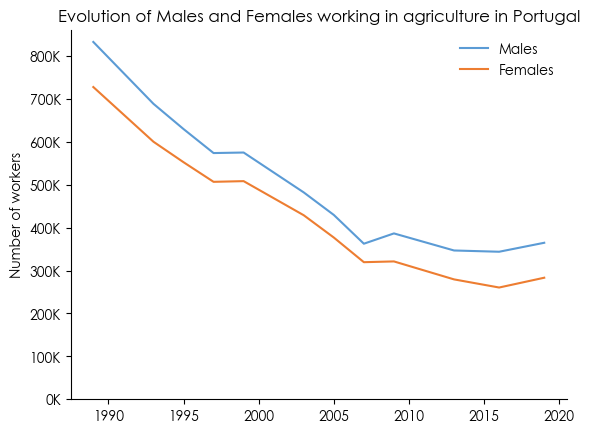

In [106]:
# plot data from both genders to compare them
plt.plot(df_gender["Year"], df_gender["Male"], label = "Males", color = "#5B9BD5")
plt.plot(df_gender["Year"], df_gender["Female"], label = "Females", color = "#ED7D31")

# titles
plt.title("Evolution of Males and Females working in agriculture in Portugal")
plt.ylabel("Number of workers")

# set the range for the y axis
plt.ylim(0,) 

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# visual improvements:

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# remove frame around legend
plt.legend(frameon = False)

plt.show()


**Insights:**
- Both in Males and Females the quantity of workers has been decreasing since 1990.
- However, since 2007 the slope of the tendency got less aggressive, with the number of workers stabilizing. 
- Surprisingly for me, the number of females working in agriculture in Portugal is very close to the number of males.
  
  
I will add a vertical line in 2007 to showcase the second insight.

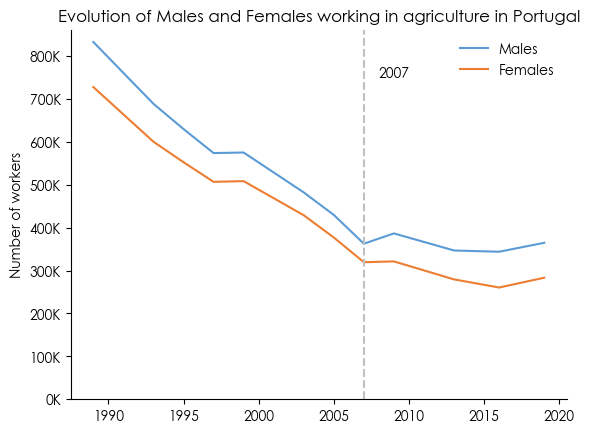

In [107]:
# plot data from both genders to compare them
plt.plot(df_gender["Year"], df_gender["Male"], label = "Males", color = "#5B9BD5")
plt.plot(df_gender["Year"], df_gender["Female"], label = "Females", color = "#ED7D31")

# titles
plt.title("Evolution of Males and Females working in agriculture in Portugal")
plt.ylabel("Number of workers")

# set the range for the y axis
plt.ylim(0,) 

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# visual improvements:

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# remove frame around legend
plt.legend(frameon = False)

# add a vertical line in 2007 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") 
plt.annotate("2007",
            xy = (2008, 750000))    # I use 2008 for the location so that the text is not overlapping the line

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\gender.png")

plt.show()

#### Additional questions abount gender:

- how did the percentage of woman over total evolved over time?
- how did the difference between males and females evolve in volume?

In [108]:
# add column with percentage of labor that are women

df_gender["Female Percentage"] = df_gender.Female / df_gender.Total

# add column with difference between males and females

df_gender["Gender difference"] = df_gender.Male - df_gender.Female

df_gender.head()

,Year,Total,Male,Female,Female Percentage,Gender difference
0,1989,1560990,833046,727944,0.466335,105102
1,1993,1289332,688879,600453,0.465709,88426
2,1995,1182767,630043,552724,0.467314,77319
3,1997,1080967,574030,506937,0.468966,67093
4,1999,1083838,575271,508567,0.469228,66704


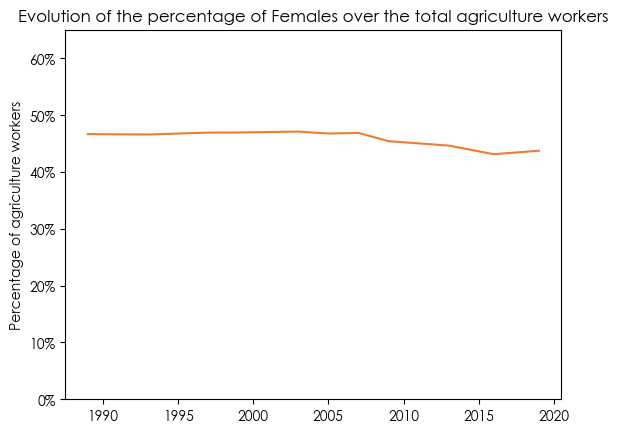

Minumun percentage of females:  43%
Maximum percentage of females:  47%


In [109]:
# plot new calculated column
plt.plot(df_gender["Year"], df_gender["Female Percentage"], color = "#ED7D31")

# titles
plt.title("Evolution of the percentage of Females over the total agriculture workers")
plt.ylabel("Percentage of agriculture workers")

# set the range for the y axis
plt.ylim(0,0.65) 

# format y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

plt.show()

# print relevant values
print("Minumun percentage of females: ", "{0:.0%}".format(min(df_gender["Female Percentage"])))
print("Maximum percentage of females: ", "{0:.0%}".format(max(df_gender["Female Percentage"])))


**Insights:**
- Almost 50% of labor working in agriculture in Portugal is female! since 1990 to today!

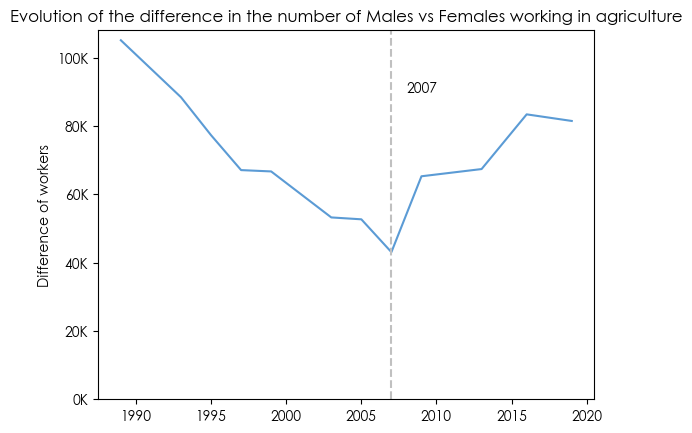

In [110]:
# plot new calculated column
plt.plot(df_gender["Year"], df_gender["Gender difference"], color = "#5B9BD5")

# title
plt.title("Evolution of the difference in the number of Males vs Females working in agriculture")
plt.ylabel("Difference of workers")

# set the range for the y axis
plt.ylim(0,)

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# add a vertical line in 2007 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") # add a vertical line on x=2007
plt.annotate("2007",
            xy = (2008, 90000))

plt.show()


**Insights:**
- The difference between the quantity of males and females working in agriculture decreased from 1990 to 200, but then the tendency inverted and the gap increased until today.

### Age analysis

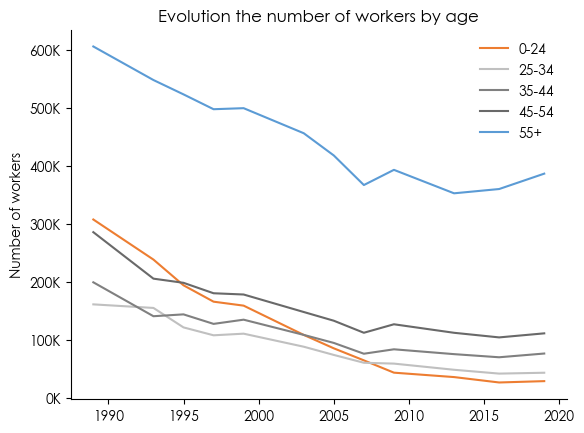

In [111]:
# plot the different age groups' data to compare them
plt.plot(df_age["Year"], df_age["0-24"], label = "0-24", color = "#ED7D31")
plt.plot(df_age["Year"], df_age["25-34"], label = "25-34", color = "silver")
plt.plot(df_age["Year"], df_age["35-44"], label = "35-44", color = "gray")
plt.plot(df_age["Year"], df_age["45-54"], label = "45-54", color = "dimgray")
plt.plot(df_age["Year"], df_age["55+"], label = "55+", color = "#5B9BD5")

# note: i'm changing the colors afterwards to emphasize the message I want to pass. 

# titles
plt.title("Evolution the number of workers by age")
plt.ylabel("Number of workers")

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# remove frame around legend
plt.legend(frameon = False)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\age.png")

plt.show()


**Insights:**
- Most of the people working in agriculture in Portugal are 55 or older. 
- The group of workers younger than 24 was the group with the greatest decrease. 

I would like to see the data from 1989 and 2019 side to side for a better comparison. 

In [112]:
# filter the lines of data from 1989 and 2019
df_age_comparison = df_age[ (df_age["Year"]==1989) | (df_age["Year"]==2019) ]

# remove columns "Year" and "Total"
df_age_comparison = df_age_comparison.loc[:, ~df_age_comparison.columns.isin(["Year", "Total"])]

# transpose dataframe and label the year columns
df_age_comparison = df_age_comparison.transpose()
df_age_comparison.columns = [1989, 2019]

# check dataframe
df_age_comparison

,1989,2019
0-24,307830,29253
25-34,161560,43717
35-44,199585,76829
45-54,285988,111599
55+,606027,386854


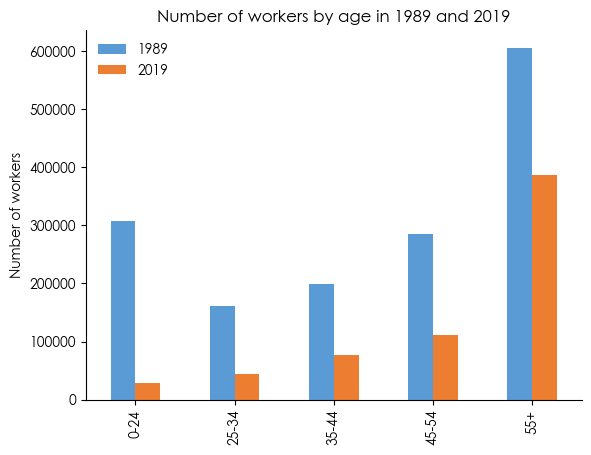

In [113]:
# plot with bars
df_age_comparison.plot.bar(color={"#5B9BD5", "#ED7D31"})

# titles
plt.title("Number of workers by age in 1989 and 2019")
plt.ylabel("Number of workers")

# remove frame around legend
plt.legend(frameon = False)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


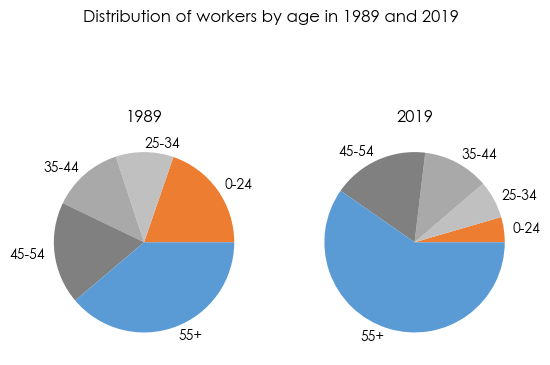

In [114]:
# plot with pies

# to assign a specific color for each specific group
colors_dictionary = {"0-24": "#ED7D31",
                    "25-34": "silver",
                    "35-44": "darkgrey",
                    "45-54": "grey",
                    "55+": "#5B9BD5"}

pie_charts = df_age_comparison.plot(kind="pie", 
                                    subplots=True,  # to keep both pies in the same visual
                                    labels=df_age_comparison.index, 
                                    legend=False,
                                    colors=[colors_dictionary[key] for key in df_age_comparison.index])

# to show the years above the pies instead of the left
pie_charts[0].set_ylabel("")
pie_charts[1].set_ylabel("")
pie_charts[0].set_title("1989")
pie_charts[1].set_title("2019")

# title (using "suptitle" to avoid overlapping)
plt.suptitle("Distribution of workers by age in 1989 and 2019")

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\age_pies.png")

plt.show()

In [115]:
# calculating relevant data labels

percent_55_1989 = df_age.loc[0,"55+"] / df_age.loc[0,"Total"]
percent_55_2019 = df_age.loc[11,"55+"] / df_age.loc[11,"Total"]

percent_24_1989 = df_age.loc[0,"0-24"] / df_age.loc[0,"Total"]
percent_24_2019 = df_age.loc[11,"0-24"] / df_age.loc[11,"Total"]

print("The percentage of workers over 55 was","{0:.0f}%".format(percent_55_1989 * 100),"in 1989 and", "{0:.0f}%".format(percent_55_2019 * 100),"in 2019.") 
print("The percentage of workers under 24 was","{0:.0f}%".format(percent_24_1989 * 100),"in 1989 and", "{0:.0f}%".format(percent_24_2019 * 100),"in 2019.") 

The percentage of workers over 55 was 39% in 1989 and 60% in 2019.
The percentage of workers under 24 was 20% in 1989 and 5% in 2019.


I will use the pie chart and the calculated percentages for my presentation as I believe is a great way to visualize the changes in the two relevant groups.

### Education analysis

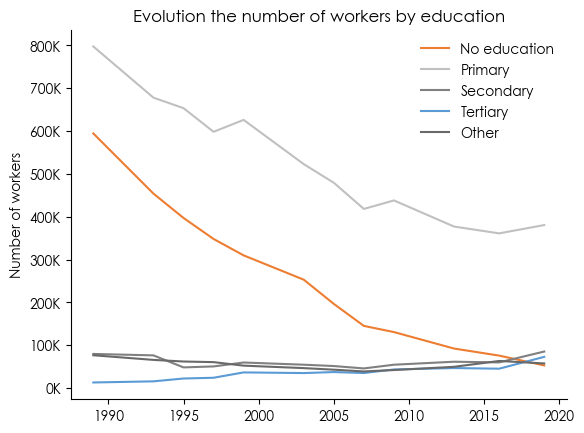

In [116]:
# plot the different education groups' data do compare them
plt.plot(df_education["Year"], df_education["No education"], label = "No education", color = "#ED7D31")
plt.plot(df_education["Year"], df_education["Primary"], label = "Primary", color = "silver")
plt.plot(df_education["Year"], df_education["Secondary"], label = "Secondary", color = "gray")
plt.plot(df_education["Year"], df_education["Tertiary"], label = "Tertiary", color = "#5B9BD5")
plt.plot(df_education["Year"], df_education["Other"], label = "Other", color = "dimgray")

# note: i'm changing the colors afterwards to emphasize the message I want to pass. 

# title
plt.title("Evolution the number of workers by education")
plt.ylabel("Number of workers")

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# remove frame around legend
plt.legend(frameon = False)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\education.png")

plt.show()


I would like to see the data from 1989 and 2019 side to side for a better comparison. 

In [117]:
# filter the line of data from 1989 and 2019
df_education_comparison = df_education[ (df_education["Year"]==1989) | (df_education["Year"]==2019) ]

# remove columns "Year" and "Total"
df_education_comparison = df_education_comparison.loc[:, ~df_education_comparison.columns.isin(["Year", "Total"])]

# tranpose dataframe and label the year columns
df_education_comparison = df_education_comparison.transpose()
df_education_comparison.columns = [1989, 2019]

# check dataframe
df_education_comparison


,1989,2019
No education,594558,52673
Primary,797690,380538
Secondary,79507,85105
Tertiary,12818,72662
Other,76417,57274


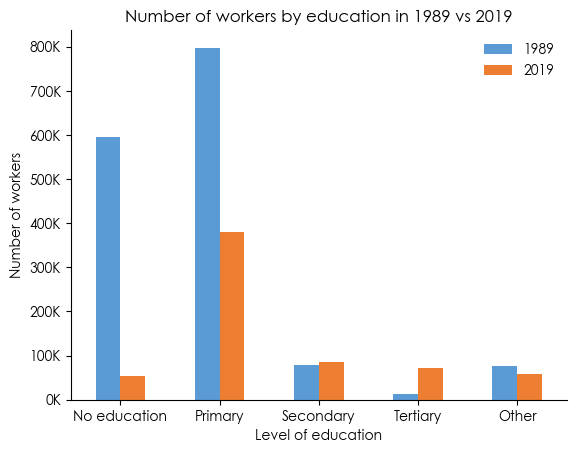

In [118]:
# plot with bars

# to assign a specific color for each specific year
colors_dictionary = {2019: "#ED7D31",
                    1989: "#5B9BD5"}

df_education_comparison.plot.bar(color=colors_dictionary)

# show x axis words horizontally
plt.xticks(rotation=0)

# title
plt.title("Number of workers by education in 1989 vs 2019")
plt.ylabel("Number of workers")
plt.xlabel("Level of education")

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# remove frame around legend
plt.legend(frameon = False)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\education_bars.png")

plt.show()

In [119]:
# Get auxiliar percentages:

no_education_1989 = df_education.loc[ df_education["Year"]==1989, "No education" ].values[0]
primary_education_1989 = df_education.loc[ df_education["Year"]==1989, "Primary" ].values[0]
total_1989 = df_education.loc[ df_education["Year"]==1989, "Total" ].values[0]
# the .values[0] at the end is used to get the first (and in this case, only) value from the resulting series. 

print("Percentage of workers with no education or primary education in 1989:", "{0:.0%}".format( (no_education_1989 + primary_education_1989) / total_1989 ))


no_education_2019 = df_education.loc[ df_education["Year"]==2019, "No education" ].values[0]
primary_education_2019 = df_education.loc[ df_education["Year"]==2019, "Primary" ].values[0]
total_2019 = df_education.loc[ df_education["Year"]==2019, "Total" ].values[0]
# the .values[0] at the end is used to get the first (and in this case, only) value from the resulting series. 

print("Percentage of workers with no education or primary education in 2019:", "{0:.0%}".format( (no_education_2019 + primary_education_2019) / total_2019 ))
print("Percentage of workers with no education in 2019:", "{0:.0%}".format( no_education_2019 / total_2019 ))


tertiary_education_1989 = df_education.loc[ df_education["Year"]==1989, "Tertiary" ].values[0]
tertiary_education_2019 = df_education.loc[ df_education["Year"]==2019, "Tertiary" ].values[0]

print("Growth of workers with tertiary education:", "{0:.0%}".format( (tertiary_education_2019 + tertiary_education_1989) / tertiary_education_1989 ))
print("Percentage of workers with tertiary education in 2019:", "{0:.0%}".format( tertiary_education_2019 / total_2019 ))


Percentage of workers with no education or primary education in 1989: 89%
Percentage of workers with no education or primary education in 2019: 67%
Percentage of workers with no education in 2019: 8%
Growth of workers with tertiary education: 667%
Percentage of workers with tertiary education in 2019: 11%


**Insights:**
- In 1989 most workers had no or primary education.
- In 2019, there are almost no workers with no education, the number os workers with only primary education was cut to half, and there was a huge increase in workers with tertiary education.

### Remuneration analysis

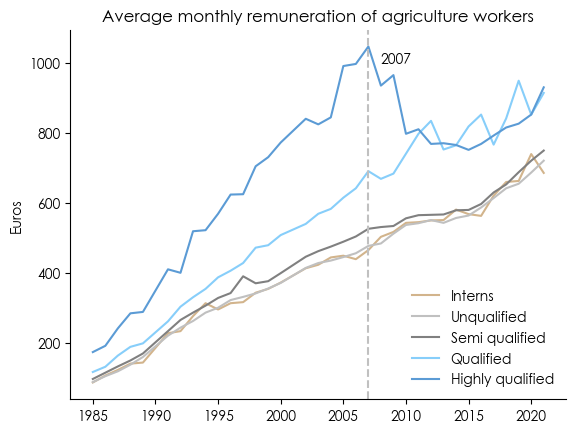

In [120]:
# Workers plot

plt.plot(df_remuneration["Year"], df_remuneration["Interns"], label = "Interns", color = "tan")
plt.plot(df_remuneration["Year"], df_remuneration["Unqualified professionals"], label = "Unqualified", color = "silver")
plt.plot(df_remuneration["Year"], df_remuneration["Semi qualified professionals"], label = "Semi qualified", color = "grey")
plt.plot(df_remuneration["Year"], df_remuneration["Qualified professionals"], label = "Qualified", color = "lightskyblue")
plt.plot(df_remuneration["Year"], df_remuneration["Highly qualified professionals"], label = "Highly qualified", color = "#5B9BD5")

# title
plt.title("Average monthly remuneration of agriculture workers")
plt.ylabel("Euros")

# remove frame around legend
plt.legend(frameon = False, loc="lower right")

# add vertical line in 2007 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") 
plt.annotate("2007",
            xy = (2008, 1000))

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\remuneration_workers.png")

plt.show()


**Insights:**
- highly qualified professionals suffered a severe cut after 2007, reaching sometimes averages bellow qualified professionals.

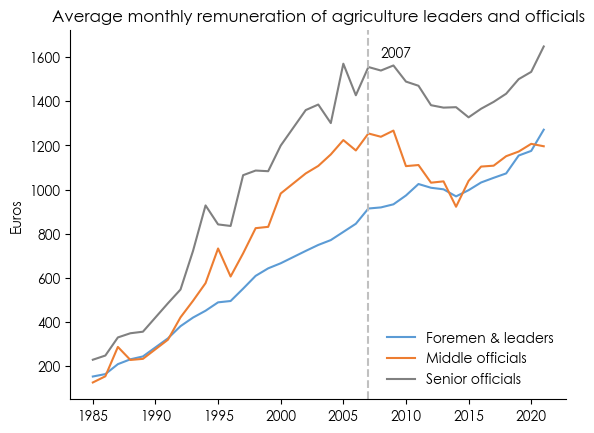

In [121]:
# Leaders plot

plt.plot(df_remuneration["Year"], df_remuneration["Foremen and team leaders"], label = "Foremen & leaders", color = "#5B9BD5")
plt.plot(df_remuneration["Year"], df_remuneration["Middle officials"], label = "Middle officials", color = "#ED7D31")
plt.plot(df_remuneration["Year"], df_remuneration["Senior officials"], label = "Senior officials", color = "grey")

# titles
plt.title("Average monthly remuneration of agriculture leaders and officials")
plt.ylabel("Euros")

# remove frame around legend
plt.legend(frameon = False, loc="lower right")

# add a vertical line in 2007 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") 
plt.annotate("2007",
            xy = (2008, 1600))

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\remuneration_leaders.png")

plt.show()


**Insights:**
- Senior and middle officials suffered a severe cut after 2005, like highly qualified professionals.
- Since 2010, middle officials and foremen and team leaders have close average remunerations.

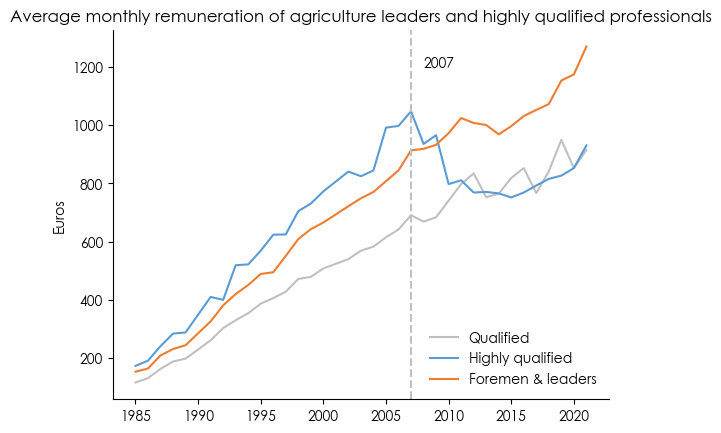

In [122]:
plt.plot(df_remuneration["Year"], df_remuneration["Qualified professionals"], label = "Qualified", color = "silver")
plt.plot(df_remuneration["Year"], df_remuneration["Highly qualified professionals"], label = "Highly qualified", color = "#5B9BD5")
plt.plot(df_remuneration["Year"], df_remuneration["Foremen and team leaders"], label = "Foremen & leaders", color = "#ED7D31")

# titles
plt.title("Average monthly remuneration of agriculture leaders and highly qualified professionals")
plt.ylabel("Euros")

# remove frame around legend
plt.legend(frameon = False, loc="lower right")

# add a vertical line in 2007 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") 
plt.annotate("2007",
            xy = (2008, 1200))

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\remuneration_leaders_qualified.png")

plt.show()


**Insights:**
- After 2010, with the cut on highly qualified professionals' remuneration, these people started getting paid ledd than foremen and team leaders who kept their growing trend.

### Familiar workers evolutions
  
Familiar: quantity of people working on farms owned by a family member.  
Non-familiar: quantity of people working on farms not owned by a family member.

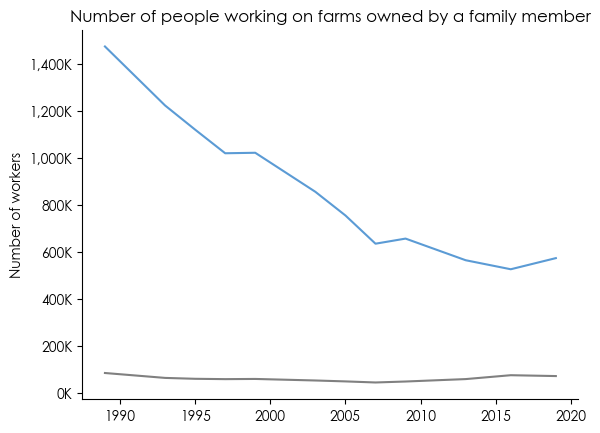

In [123]:
# plot both series for comparison 
plt.plot(df_familiar["Year"], df_familiar["Familiar"], label = "Familiar", color = "#5B9BD5")
plt.plot(df_familiar["Year"], df_familiar["Non familiar"], label = "Non familiar", color = "grey")

#titles
plt.title("Number of people working on farms owned by a family member")
plt.ylabel("Number of workers")

# format y axis as thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x/1000)))
plt.tick_params(axis='y', which='major', labelsize=10)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\familiar.png")

plt.show()


In [124]:
# Get auxiliar percentages:

familiar_2019 = df_familiar.loc[ df_familiar["Year"]==2019, "Familiar" ].values[0]
familiar_1989 = df_familiar.loc[ df_familiar["Year"]==1989, "Familiar" ].values[0]

print("Percentage of people working in a farm owned by a family member:", "{0:.0%}".format( (familiar_2019 - familiar_1989) / familiar_1989 ))

Percentage of people working in a farm owned by a family member: -61%


**Insights:**
- The great decrease in agriculture labor is mainly caused by the decrease of people working on family farms.

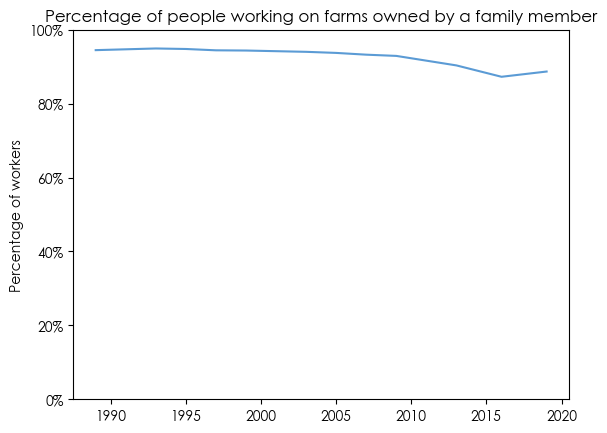

In [125]:
# plot a calculation (percentage of familiar)
plt.plot(df_familiar["Year"], df_familiar["Familiar"]/df_familiar["Total"], label = "Familiar", color = "#5B9BD5")

# titles
plt.title("Percentage of people working on farms owned by a family member")
plt.ylabel("Percentage of workers")

# set the range for the y axis
plt.ylim(0,1)

# format y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol="%", is_latex=False))

plt.show()


In [126]:
# Get auxiliar percentages:

familiar_2019 = df_familiar.loc[ df_familiar["Year"]==2019, "Familiar" ].values[0]
total_2019 = df_familiar.loc[ df_familiar["Year"]==2019, "Total" ].values[0]

print("Percentage of people working in a farm owned by a family member:", "{0:.0%}".format( familiar_2019 / total_2019 ))

familiar_1989 = df_familiar.loc[ df_familiar["Year"]==1989, "Familiar" ].values[0]
total_1989 = df_familiar.loc[ df_familiar["Year"]==1989, "Total" ].values[0]

print("Percentage of people working in a farm owned by a family member:", "{0:.0%}".format( familiar_1989 / total_1989 ))

Percentage of people working in a farm owned by a family member: 89%
Percentage of people working in a farm owned by a family member: 94%


**Insights:**
- Although the number of people working of farms owned by a family member decreased, most people working on agriculture today still work at a family's farm.

### Value added

Value added = Production - Intermediate consumption

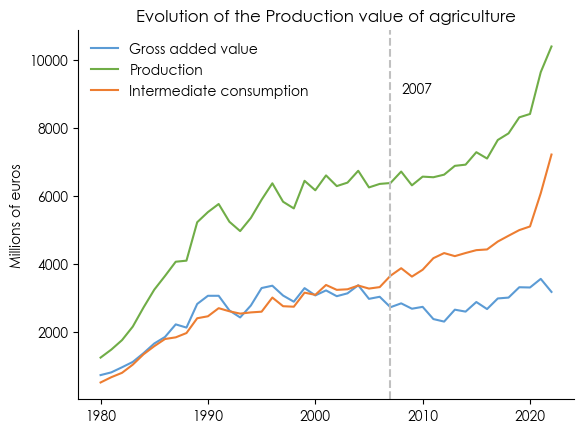

In [127]:
# plot the data series for comparison
plt.plot(df_value["Year"], df_value["Gross added value"], label = "Gross added value", color = "#5B9BD5")
plt.plot(df_value["Year"], df_value["Production"], label = "Production", color = "#70AD47")
plt.plot(df_value["Year"], df_value["Intermediate consumption"], label = "Intermediate consumption", color = "#ED7D31")

# titles
plt.title("Evolution of the Production value of agriculture")
plt.ylabel("Millions of euros")

# add a vertical line in 2010 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") 
plt.annotate("2007",
            xy = (2008, 9000))

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# remove frame around legend
plt.legend(frameon = False)

# save file
# plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\value_added.png")

plt.show()


**Insights:**
- The value of production from agriculture increased a lot from 2010 to 2022.
- However, since the intermediate consumption also increased in value, the gross added value remained low and even decreased in 2022. 
  
  
How has the margin of value added over production evolved?

In [128]:
# add column with percentage of gross added value over production

df_value["Value over Production"] = df_value["Gross added value"] / df_value["Production"]

df_value.head()

,Year,Gross added value,Production,Intermediate consumption,Value over Production
0,1980,731,1245,514,0.587149
1,1981,811,1480,669,0.547973
2,1982,961,1759,798,0.546333
3,1983,1118,2156,1038,0.518553
4,1984,1375,2717,1342,0.506073


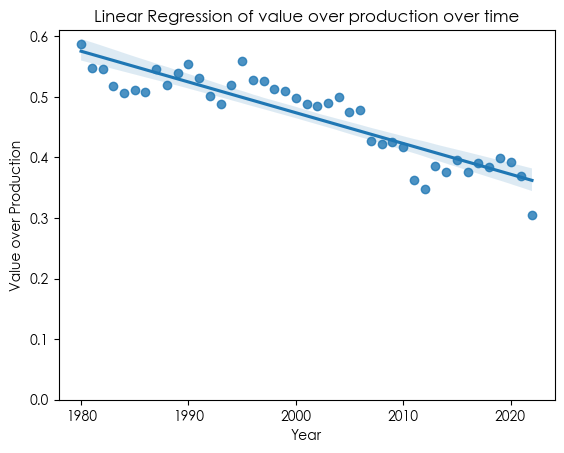

In [129]:
# create a linear regression to plot a trend line

# create a linear regression object:
lm=LinearRegression()

# define the predictor variable and target variable:
X = df_value[['Year']]
Y = df_value['Value over Production']

# find the parameter b0 and b1:
lm.fit(X, Y)

# obtain the predictor (array):
Yhat = lm.predict(X)

# see the intercept (b0): 10.628959673570009
lm.intercept_

# see the slope (b1): -0.00507752
lm.coef_

# scatterplot with linear regression: 
sns.regplot(x="Year", y="Value over Production", data=df_value)
plt.ylim(0,)

plt.title("Linear Regression of value over production over time")

plt.show()

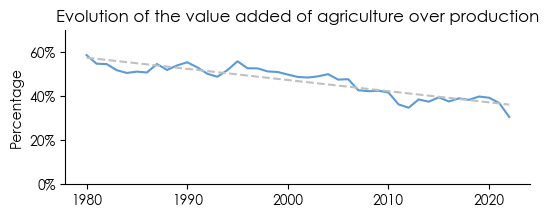

In [130]:
# size changed to fit the presentation slide
plt.figure(figsize=(6,2))

# plot data and the linear regression 
plt.plot(df_value["Year"], df_value["Value over Production"], color = "#5B9BD5")
plt.plot(df_value["Year"], 10.628959673570009 -0.00507752 * df_value["Year"], color = "silver", linestyle = "--")

# titles
plt.title("Evolution of the value added of agriculture over production")
plt.ylabel("Percentage")

# set the range for the y axis
plt.ylim(0,0.7) 

# format y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\value_added_margin.png")

plt.show()

**Insights:**
- Although production value has been increasing, with costs increasing more, the value added can't keep up.

### Value added as percentage of GDP

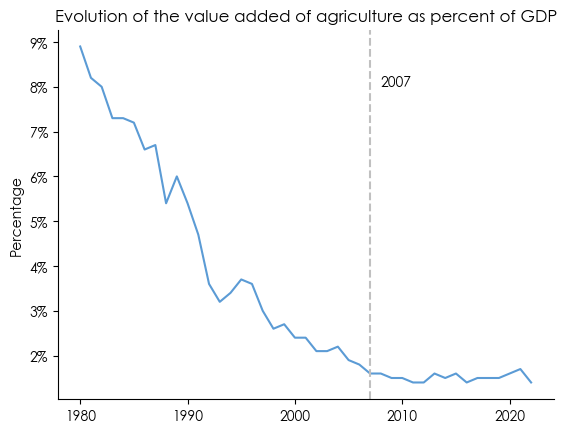

In [131]:
# plot values formated as percentage (in data a 9 means 9%)
plt.plot(df_value_gdp["Year"], df_value_gdp["Value added as percent of GDP"]/100, label = "Value added as percent of GDP", color = "#5B9BD5")

# title
plt.title("Evolution of the value added of agriculture as percent of GDP")
plt.ylabel("Percentage")

# format y axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0, symbol='%', is_latex=False))

# add a vertical line in 2007 to support the story
plt.axvline(x = 2007, color = 'silver', linestyle = "--") 
plt.annotate("2007",
            xy = (2008, 0.08))

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\value_gdp.png")

plt.show()


**Insights:**
- The percentage of the portuguese GDP that corresponds to the agricultural sector decreased dramatically since 1980, rounding 1.5% since 2007.

### Profits from agriculture evolutions

Net profit = Operating profit - Land rent - Interest payable + Interest receivable

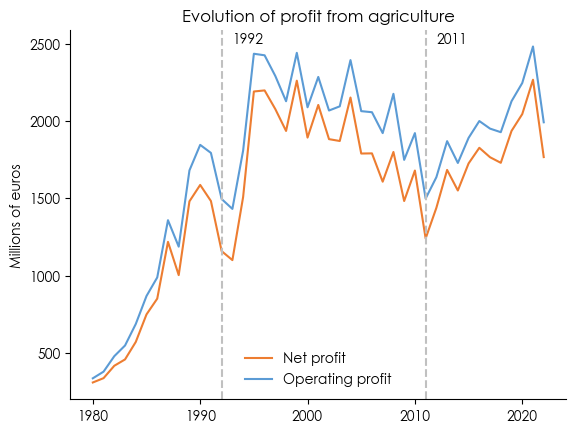

In [136]:
# plot profits
plt.plot(df_profit["Year"], df_profit["Net profit"], label = "Net profit", color = "#ED7D31")
plt.plot(df_profit["Year"], df_profit["Operating profit"], label = "Operating profit", color = "#5B9BD5")

# titles
plt.title("Evolution of profit from agriculture")
plt.ylabel("Millions of euros")

# remove frame around legend
plt.legend(frameon = False)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add a vertical line in 1992 to support the story
plt.axvline(x = 1992, color = 'silver', linestyle = "--") 
plt.annotate("1992",
            xy = (1993, 2500))
        
# add a vertical line in 2007 to support the story
plt.axvline(x = 2011, color = 'silver', linestyle = "--") 
plt.annotate("2011",
            xy = (2012, 2500))

# save file
# plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\profit.png")

plt.show()


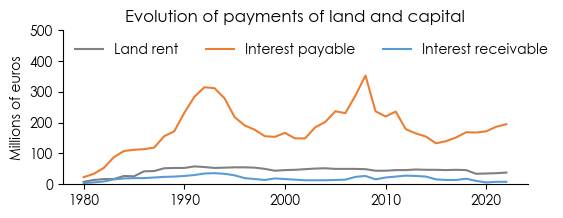

In [133]:
# figure size changed to fit the presentation slide
plt.figure(figsize=(6,2))

# plot series
plt.plot(df_profit["Year"], df_profit["Land rent"], label = "Land rent", color = "grey")
plt.plot(df_profit["Year"], df_profit["Interest payable"], label = "Interest payable", color = "#ED7D31")
plt.plot(df_profit["Year"], df_profit["Interest receivable"], label = "Interest receivable", color = "#5B9BD5")

# title
plt.title("Evolution of payments of land and capital")
plt.ylabel("Millions of euros")

# set the range for the y axis
plt.ylim(0,500) 

# format legend
plt.legend(frameon = False, loc = "upper left", ncol = 3)

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\land_capital.png")

plt.show()


**Aditional question:**
- Is there a correlation between the value paid in interest and the net profit?

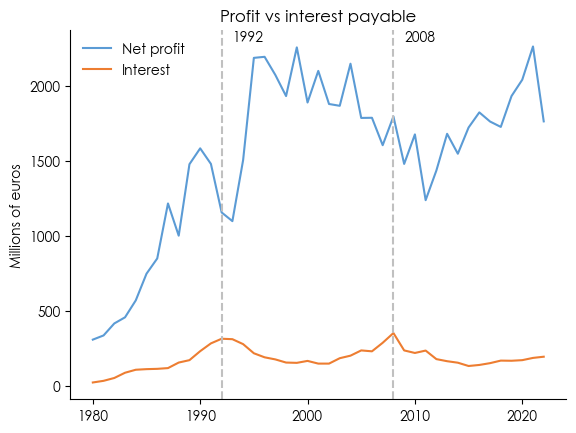

In [134]:
# ploting the two series for a visual comparison
plt.plot(df_profit["Year"], df_profit["Net profit"], label = "Net profit", color = "#5B9BD5")
plt.plot(df_profit["Year"], df_profit["Interest payable"], label = "Interest", color = "#ED7D31")

# title
plt.title("Profit vs interest payable")
plt.ylabel("Millions of euros")

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add a vertical line in 1992 to support the story
plt.axvline(x = 1992, color = 'silver', linestyle = "--") 
plt.annotate("1992",
            xy = (1993, 2300))
        
# add to show a vertical line in 2007 to support the story
plt.axvline(x = 2008, color = 'silver', linestyle = "--") 
plt.annotate("2008",
            xy = (2009, 2300))

# format legend
plt.legend(frameon = False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\profit_interest.png")

plt.show()


In [137]:
# create a linear regression to plot a trend line

# create a linear regression object:
lm=LinearRegression()

# define the predictor variable and target variable:
X = df_profit[['Interest payable']]
Y = df_profit['Net profit']

# find the parameter b0 and b1:
lm.fit(X, Y)

# obtain the predictor (array):
Yhat = lm.predict(X)

# see the intercept (b0): 
lm.intercept_
print("Intercept: ", lm.intercept_)

# see the slope (b1): 
lm.coef_
print("Slope: ", lm.coef_)


Intercept:  931.8780787908177
Slope:  [3.32542398]


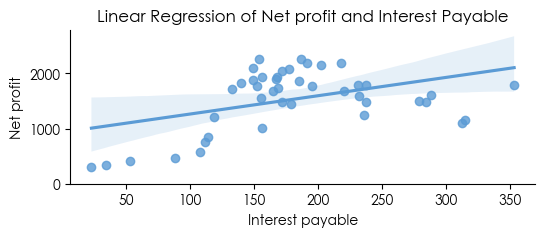

In [138]:
# scatterplot with linear regression: 
plt.figure(figsize=(6,2))
sns.regplot(x="Interest payable", y="Net profit", data=df_profit, color="#5B9BD5")
plt.ylim(0,)

plt.title("Linear Regression of Net profit and Interest Payable")

# remove frame around graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save file
#plt.savefig("C:\\Users\\raque\\Documents\\Data Analytics\\Portuguese Agriculture Python\\output graphs\\profit_interest_regression.png")

plt.show()


In [139]:
# check the r^2 to evaluate the model ()
lm.score(X,Y)

np.corrcoef(df_profit['Interest payable'], df_profit['Net profit'])

print("R-squared: ", lm.score(X,Y))
print("Correlation: ", np.corrcoef(df_profit['Interest payable'], df_profit['Net profit']))

R-squared:  0.1892539941131457
Correlation:  [[1.         0.43503333]
 [0.43503333 1.        ]]


**Insights:**
- Dips in the net profit seem to happen in periods with higher interest payments
- However, a linear model with a 0.18 R-squared is not a good fit, and the correlation of 0.44 is very weak.

## Next steps

Based on this exploratory analysis I will put together a presentation to tell this story in slides for easier sharing.

**Main conclusions:**
- Gender:
  - Both in Males and Females the number of workers has been decreasing since 1990.
  - Since 2007 the number of workers looks like stabilizing.
  - Surprisingly for me, females have represented between 43 and 48% of the workforce until today.
###
- Age:
  - Most of the workforce is 55 or older. 
  - The group of workers younger than 24 years old was the group with the greatest decrease, falling from 20% in 1989 to 5% in 2019.
### 
- Education:
  - In 1989, 89% of workers had no more than primary education.
  - In 2019, this percentage fell to 67%, with only 8% having no education. 
  - The number of workers with tertiary education grew by 667% from 1989 to 2019, but it still only represents 11%.
### 
- Familiar farms: 
  - The great shrinkage of agricultural labor is mainly caused by the decrease of 61% in people working on farms owned by a family member.
  - Still, in 2019, 89% of the workforce was working on a family farm, compared with 94%, in 1989.
### 
- Remuneration: 
  - Highly qualified professionals suffered a severe cut after 2007, losing their advantage over the salary of qualified workers.
  - Senior and middle officials also saw their remuneration fall after 2007. 
  - The average pay of middle officials got close to the pay of foremen and team leaders. 
  - After 2007, highly qualified workers also lost their premium over foremen and team leaders.
### 
- Value added:
  - The value of production from agriculture increased a lot from 2007 to 2022.
  - However, the intermediate consumption ate most of that increase, and the gross added value remained low.
  - The percentage of the Portuguese GDP that corresponds to the agricultural sector decreased dramatically since 1980, staying around 1.5% since 2007.
### 
- Profits:
  - Profits from agriculture had 2 major dips, in 1992 and 2011. 
  - Contrary to my hypothesis, there is not a relevant correlation between profit and paid interest data. 
  - Yet, higher interest rates may be associated with periods of financial distress, which might impact agricultural businesses. 
  